In [95]:
#load the data into a single matrix for data and single matrix for labels
import numpy as np
import os
import csv
from sklearn.model_selection import train_test_split

def load_data(directory_path):
    # List all CSV files in the directory
    files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    num_files = len(files)
    
    if num_files == 0:
        raise ValueError("No CSV files found in the specified directory.")

    # Initialize arrays to store data and labels
    data = np.zeros((num_files, 40, 50), dtype=np.float32)
    labels = np.zeros((num_files, 1), dtype=np.float32)

    # Read data from each CSV file
    for i, file in enumerate(files):
        file_path = os.path.join(directory_path, file)
        
        try:
            with open(file_path, 'r') as f:
                reader = csv.reader(f)
                # Read data and replace empty cells with zeros
                data[i] = np.nan_to_num(np.array([[float(entry) if entry.strip() else 0.0 for entry in row] for row in reader], dtype=np.float32))
        except ValueError as e:
            print(f"Error reading file '{file}': {e}")
            continue

        # Extract label from file name
        if 'C_m01' in file:
            labels[i] = 1.0
        elif 'I_m01' in file:
            labels[i] = 0.6
        else:
            #print("Invalid file name:", file)
            labels[i] = 0.0
    
    return data, labels

directory_path = 'ui_and_samples'
data, labels = load_data(directory_path)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size=0.06, random_state=42)

print("Train data shape:", train_x.shape)
print("Train labels shape:", train_y.shape)
print("Test data shape:", test_x.shape)
print("Test labels shape:", test_y.shape)


Data shape: (381, 40, 50)
Labels shape: (381, 1)
Train data shape: (358, 40, 50)
Train labels shape: (358, 1)
Test data shape: (23, 40, 50)
Test labels shape: (23, 1)


In [24]:
def load_test_data(directory_path):
    # List all CSV files in the directory
    files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    num_files = len(files)
    
    if num_files == 0:
        raise ValueError("No CSV files found in the specified directory.")

    # Initialize arrays to store data and labels
    data = np.zeros((num_files, 40, 50), dtype=np.float32)
    labels = np.zeros((num_files, 1), dtype=np.float32)

    # Read data from each CSV file
    for i, file in enumerate(files):
        file_path = os.path.join(directory_path, file)
        
        try:
            with open(file_path, 'r') as f:
                reader = csv.reader(f)
                # Read data and replace empty cells with zeros
                data[i] = np.nan_to_num(np.array([[float(entry) if entry.strip() else 0.0 for entry in row] for row in reader], dtype=np.float32))
        except ValueError as e:
            print(f"Error reading file '{file}': {e}")
            continue
    
    return data

noahg = load_test_data('normalized_noah')
mollyg = load_test_data('mollyg_norm')
mollyb = load_test_data('mollyb_norm')
celesteg = load_test_data('celesteg_norm')
celesteb = load_test_data('celesteb_norm')
not_squat = load_test_data('not_squat')

Epoch 1/30
45/45 [==============================] - 2s 16ms/step - loss: 0.6132 - accuracy: 0.4832 - val_loss: 0.5184 - val_accuracy: 0.6957
Epoch 2/30
45/45 [==============================] - 0s 9ms/step - loss: 0.3989 - accuracy: 0.7179 - val_loss: 0.3707 - val_accuracy: 0.7391
Epoch 3/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2943 - accuracy: 0.7207 - val_loss: 0.2987 - val_accuracy: 0.7391
Epoch 4/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2497 - accuracy: 0.7318 - val_loss: 0.3057 - val_accuracy: 0.7391
Epoch 5/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2298 - accuracy: 0.7318 - val_loss: 0.2960 - val_accuracy: 0.7391
Epoch 6/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2162 - accuracy: 0.7318 - val_loss: 0.2754 - val_accuracy: 0.7391
Epoch 7/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2089 - accuracy: 0.7318 - val_loss: 0.2625 - val_accuracy: 0.7391
Epoch 8/30
45/45 [=

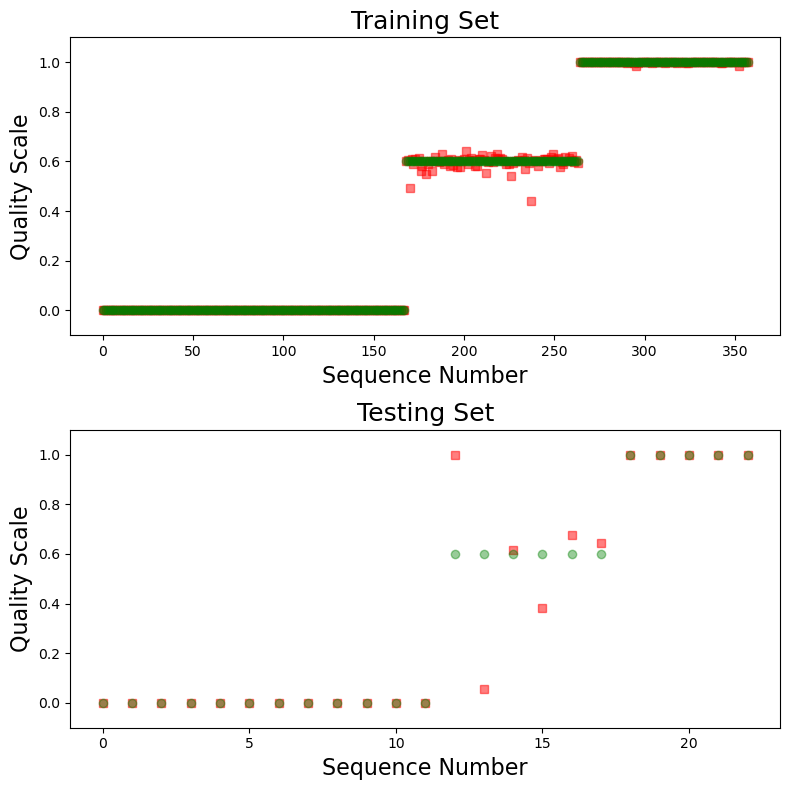

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 60)                26640     
                                                                 
 dense_64 (Dense)            (None, 20)                1220      
                                                                 
 dense_65 (Dense)            (None, 1)                 21        
                                                                 
Total params: 27881 (108.91 KB)
Trainable params: 27881 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    LSTM(60, input_shape=(40, 50)),  # LSTM layer with 64 units
    Dense(20, activation='relu'),     # Dense layer with 32 units and ReLU activation
    Dense(1, activation='sigmoid')    # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 4. Train the model
history = model.fit(train_x, train_y, epochs=30, batch_size=8, validation_data=(test_x, test_y))

# 5. Evaluate the model
loss, accuracy = model.evaluate(test_x, test_y)
print("TEst Loss:", loss)
print("tEst Accuracy:", accuracy)


train_indices = np.argsort(train_y.flatten(), axis=0)
sorted_train_x = train_x[train_indices]
sorted_train_y = train_y[train_indices]

# Sort the test set by label
test_indices = np.argsort(test_y.flatten(), axis=0)
sorted_test_x = test_x[test_indices]
sorted_test_y = test_y[test_indices]

# Predictions
pred_train = model.predict(sorted_train_x)
pred_test = model.predict(sorted_test_x)
# Predictions
#pred_train = model.predict(train_x)
#pred_test = model.predict(test_x)

#sortedtrain = np.argsort(train_y, axis=0)
#print(sortedtrain)

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(pred_train, 's', color='red', label='Prediction', linestyle='None', alpha=0.5, markersize=6)
plt.plot(sorted_train_y, 'o', color='green', label='Quality Score', alpha=0.4, markersize=6)
plt.ylim([-0.1, 1.1])
plt.title('Training Set', fontsize=18)
plt.xlabel('Sequence Number', fontsize=16)
plt.ylabel('Quality Scale', fontsize=16)

plt.subplot(2, 1, 2)
plt.plot(pred_test, 's', color='red', label='Prediction', linestyle='None', alpha=0.5, markersize=6)
plt.plot(sorted_test_y, 'o', color='green', label='Quality Score', alpha=0.4, markersize=6)
plt.title('Testing Set', fontsize=18)
plt.ylim([-0.1, 1.1])
plt.xlabel('Sequence Number', fontsize=16)
plt.ylabel('Quality Scale', fontsize=16)

plt.tight_layout()
plt.show()

# Print the model summary
model.summary()

1/1 [==============================] - 0s 14ms/step


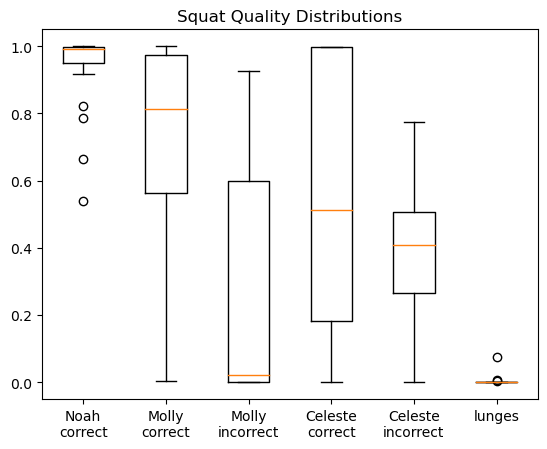

In [99]:
pred_noahg = np.squeeze(model.predict(noahg))
pred_mollyg = np.squeeze(model.predict(mollyg))
pred_mollyb = np.squeeze(model.predict(mollyb))
pred_celesteg = np.squeeze(model.predict(celesteg))
pred_celesteb = np.squeeze(model.predict(celesteb))
pred_not_squat = np.squeeze(model.predict(not_squat))
data = [pred_noahg, pred_mollyg, pred_mollyb, pred_celesteg, pred_celesteb, pred_not_squat]

# Create labels for the boxplots
labels = ['Noah\ncorrect', 'Molly\ncorrect', 'Molly\nincorrect', 'Celeste\ncorrect', 'Celeste\nincorrect', 'lunges']

# Create boxplots with labels
plt.boxplot(data, labels=labels)

plt.title('Squat Quality Distributions')
#plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=25, ha='right')
# Show the plot
plt.show()

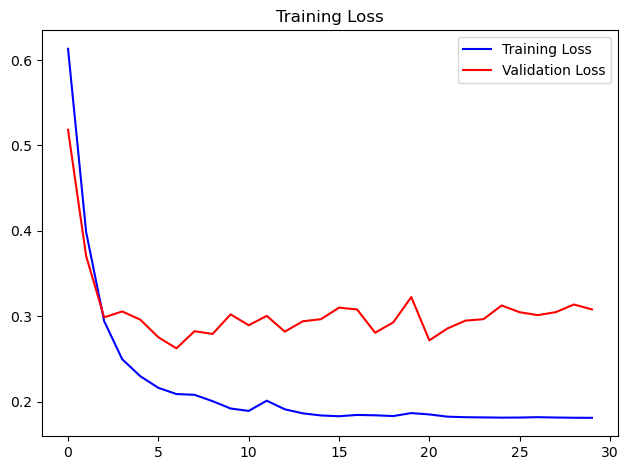

Training loss 0.18111270666122437
Validation loss 0.2624654769897461


In [100]:

# Plot the results
plt.figure(1)
plt.plot(history.history['loss'], 'b', label = 'Training Loss')
plt.title('Training Loss')
plt.plot(history.history['val_loss'], 'r', label = 'Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Print the minimum loss
print("Training loss", np.min(history.history['loss']))
print("Validation loss",np.min(history.history['val_loss']))    

In [101]:
model.save('models/Squatv5.keras')